In [2]:
%matplotlib inline

import scipy.io
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import collections

In [78]:
# From previous exercise
def sigmoid(y):
    return 1 / (1 + np.exp(-y))

def psi(y):
    return 1 - 2 * sigmoid(y)

def update_natural(W, x):
    n = x.shape[0]
    phee = psi(W.dot(x)).reshape(n, 1)
    delta_W = np.dot(phee.dot(np.dot(W, x).reshape(1, n)), W)
    delta_W = delta_W + W # multiplied out delta function
    delta_W[0,0] = 0 # Bell-Seijnowski solution
    delta_W[n-1,n-1] = 0
    return delta_W

def plot(ax, data, **kwargs):
    ax.plot(data, **kwargs)
    if 'label' in kwargs:
        ax.set_title(kwargs['label'])
    # scipy.io.wavfile.write(kwargs['label'] + '.wav', 8192, data),


def online_ica(X, X0, lambda_= 0.99, epsilon = 0.001, eta = 0.15):
    n = X.shape[0]  # Number of sources
    W = np.linalg.inv(np.random.RandomState(seed+1).rand(n, n))
    W[0,0] = 1  # Bell-Seijnowski solution
    W[n-1,n-1] = 1  # TODO: Is that right?
    time = 0
    while eta > epsilon:
        example = X.T[time % X.shape[1]]
        eta = eta * lambda_
        W += eta * update_natural(W, example)
        time += 1
    return W.dot(X0)

seed = 13
sound1 = np.loadtxt('sounds/sound1.dat')
sound2 = np.loadtxt('sounds/sound2.dat')
sounds = np.concatenate([[sound1, sound2]], axis=1)
A = np.linalg.inv(np.random.RandomState(seed+4).rand(2,2))
X0 = A.dot(sounds)
X = X0[:,np.random.RandomState(seed+1).permutation(X0.shape[1])]
X -= X.mean(axis=1).reshape((2, 1))

Calculated unmixing matrix in 499 steps


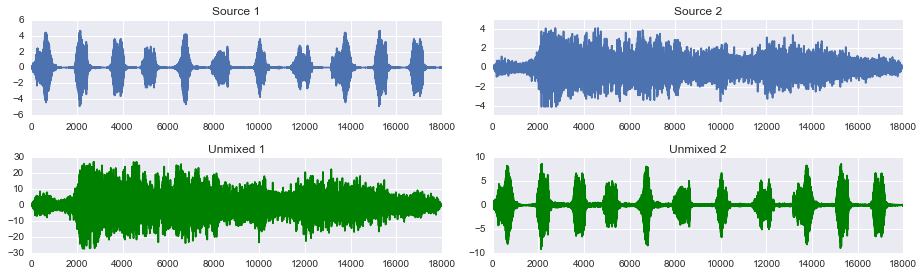

In [79]:
# 7.1. (a) Online ICA with natural gradient decaying slowly to 0
unmixed_nat = online_ica(X, X0)

print("Calculated unmixing matrix in {} steps".format(time))
fig, ax = plt.subplots(2, 2, figsize=(13, 4))
plot(ax[0, 0], sound1, label='Source 1')
plot(ax[0, 1], sound2, label='Source 2')
plot(ax[1, 0], unmixed_nat[0,:], label='Unmixed 1', color='green')
plot(ax[1, 1], unmixed_nat[1,:], label='Unmixed 2', color='green')
fig.tight_layout()


In [121]:
print(sound3.mean())

0.509072679969


In [ ]:
def generate_sample(sound):
    new_sound = np.random.RandomState(seed).rand(*sound.shape) * sound1.max()
    new_sound[::2] *= -1
    std = sound.std()
    std_rounded = int(std1 * 1000) / 1000
    std_n = 0
    steps = 0
    while int(std_n * 1000) / 1000 != std_rounded:
        pos = np.random.RandomState(steps).randint(new_sound.shape[0])
        if std_n > std:
            new_sound[pos] = new_sound.mean()
        else:
            new_sound[pos] += std
        std_n = new_sound.std()
        steps += 1
    print("Generating third sample took {} steps".format(steps))
    return new_sound

sound3 = generate_sample(sound1)

2.67878994941
2.60617590681
2.53203434473
2.46327329287
2.39674746251
2.32922742296
2.26524595751
2.20278998673
2.14415355222
2.08463947596
2.02655977716
1.97192458597
1.91424146004
1.85883552973
1.80382156544
1.75162983589
1.70736038267
1.66447493247
1.61121819885
1.56383817063
1.51660955322
1.47804921551
1.43708004581
1.39763048888
1.35592286745
1.31948422285
1.2833280877
1.24622016536
1.21393121375
1.18375473458
1.1546080893
1.11992802885
1.08728253377
1.06004384211
1.02722653794
Generating third sample took 34926 steps


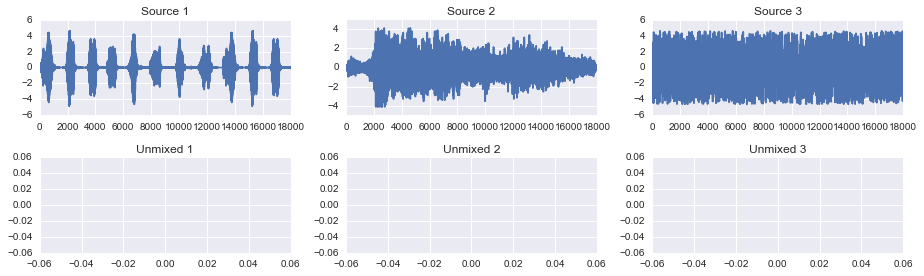

In [145]:
# 7.1 (b)
sounds = np.concatenate([[sound1, sound2, sound3]], axis=1)
A = np.linalg.inv(np.random.RandomState(seed).rand(3,3))
X0 = A.dot(sounds)
X = X0[:,np.random.RandomState(seed+1).permutation(X0.shape[1])]
X -= X.mean(axis=1).reshape((3, 1))

unmixed3_nat = online_ica(X, X0)

fig, ax = plt.subplots(2, 3, figsize=(13, 4))
plot(ax[0, 0], sound1, label='Source 1')
plot(ax[0, 1], sound2, label='Source 2')
plot(ax[0, 2], sound3, label='Source 3')
plot(ax[1, 0], unmixed3_nat[0,:], label='Unmixed 1', color='green')
plot(ax[1, 1], unmixed3_nat[1,:], label='Unmixed 2', color='green')
plot(ax[1, 2], unmixed3_nat[2,:], label='Unmixed 3', color='green')
fig.tight_layout()



In [141]:
sound3.min()

-0.99998015972449927

In [ ]:
mat = scipy.io.loadmat('distrib.mat')
uniform = mat['uniform']
normal = mat['normal']
laplacian = mat['laplacian']

A = np.array([[4,3],[2,1]])

In [ ]:
def plot_dataset(data, title='', xlabel='Source 1', ylabel='Source 2'):
    df = pd.DataFrame(data.T, columns=[xlabel, ylabel])
#     g = sns.jointplot(x=xlabel, y=ylabel, data=df)
#     sns.plt.suptitle(title, fontsize=20, y=1.08)

In [ ]:
def procedure(s):
    #Plot the original sources
    plot_dataset(s, title='Original sources')
    
    #7.3a - Apply mixing matrix A and plot mixed data
    x = np.dot(A,s)
    plot_dataset(x, title='After mixing', xlabel='Mixed 1', ylabel='Mixed 2')
    
    #7.3b - Center to mean 0 and plot centered data
    x = x - np.mean(x,axis=1).reshape(2,1)
    plot_dataset(x, title='After centering', xlabel='Centered 1', ylabel='Centered 2')
    
    #7.3c - Decorrelate by PCA and project onto the principal components
    # (consult: 1. eig vs eigh 2. should we sort eigvals?)
    covmat = np.cov(x)
    eigvals, eigvecs = np.linalg.eig(covmat)

In [ ]:
procedure(normal)

In [ ]:
def kurtosis_of_dist(s):
    x = np.dot(A,s)
    x -= np.mean(x)

In [ ]:

# sns.set(color_codes=True)


# mean, cov = [0, 1], [(1, .5), (.5, 1)]
# data = np.random.multivariate_normal(mean, cov, 200)
# df = pd.DataFrame(data, columns=["x", "y"])

# sns.jointplot(x="x", y="y", data=df);